In [1]:
import os
from matplotlib import pyplot as plt
from smoothadv.analyze import Line, ApproximateAccuracy, plot_certified_accuracy
import glob
import numpy as np

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams['lines.linewidth'] = 3

In [11]:
def get_lines_list(rpath, patchsize, sigma,  reduction='max', patch_smooth=False, smoothmax=False, numpatches=None):
    print(f'{patchsize}, {reduction}, {sigma}')
    dpaths = [rpath+f for f in os.listdir(rpath) if (f[0]!='.') and (patchsize in f) and (sigma in f) and (reduction in f)]
    print(dpaths)
    if patchsize != '':
        patchsize = int(patchsize.replace('_', ''))
    if patch_smooth:
        patch_smooth_str = 'Uncorrelated patch noise'
    else:
        patch_smooth_str = ''
    if patchsize != '':
        if not smoothmax:
            res = [Line(ApproximateAccuracy(i), f'Stride: {patchsize}, sigma:{sigma}, Reduction: {reduction}') for i in dpaths]
        else:
            res = [Line(ApproximateAccuracy(i), f'Stride: {patchsize}, sigma:{sigma}, Reduction:{reduction}, smooth max, numpatches:{numpatches}') for i in dpaths]
    else:
        res = [Line(ApproximateAccuracy(i), f'Salman et al.,  sigma:{sigma}') for i in dpaths]
    return res

In [3]:
max_res = get_lines_list('certify_results_salman/', '_4_', '0.12', 'max')
min_res = get_lines_list('certify_results_salman/', '_4_',  '0.12', 'min')
mean_res = get_lines_list('certify_results_salman/', '_4_', '0.12', 'mean')
max_res2 = get_lines_list('certify_results_salman/', '_2_', '0.12', 'max')
min_res2 = get_lines_list('certify_results_salman/', '_2_',  '0.12', 'min')
mean_res2 = get_lines_list('certify_results_salman/', '_2_', '0.12', 'mean')
orig = get_lines_list('certify_results_salman_new_nopatch_3232/', '', '0.12', '')
max_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.12', 'max', True)
min_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.12', 'min', True)
mean_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.12', 'mean', True)

results_0_12 = max_res
results_0_12.extend(min_res)
results_0_12.extend(mean_res)
results_0_12.extend(orig)
results_0_12.extend(max_res_patch_smooth)
results_0_12.extend(min_res_patch_smooth)
results_0_12.extend(mean_res_patch_smooth)
# results_0_12.extend(max_res2)
# results_0_12.extend(min_res2)
# results_0_12.extend(mean_res2)

_4_, max, 0.12
['certify_results_salman/output_resnet110_0.12_32_4_max.csv']
_4_, min, 0.12
['certify_results_salman/output_resnet110_0.12_32_4_min.csv']
_4_, mean, 0.12
['certify_results_salman/output_resnet110_0.12_32_4_mean.csv']
_2_, max, 0.12
['certify_results_salman/output_resnet110_0.12_32_2_max.csv']
_2_, min, 0.12
['certify_results_salman/output_resnet110_0.12_32_2_min.csv']
_2_, mean, 0.12
['certify_results_salman/output_resnet110_0.12_32_2_mean.csv']
, , 0.12
['certify_results_salman_new_nopatch_3232/output_resnet110_0.12_32_1_mean.csv']
_4_, max, 0.12
['certify_results_salman_patchsmooth/output_resnet110_0.12_32_4_max.csv']
_4_, min, 0.12
['certify_results_salman_patchsmooth/output_resnet110_0.12_32_4_min.csv']
_4_, mean, 0.12
['certify_results_salman_patchsmooth/output_resnet110_0.12_32_4_mean.csv']


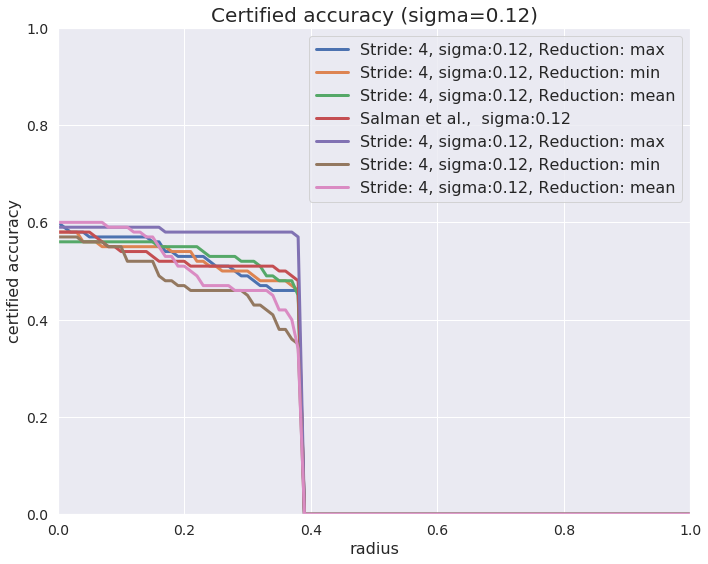

In [4]:
plot_certified_accuracy('certified acc', 'Certified accuracy (sigma=0.12)', 1.0, results_0_12)

, , 0.12
['certify_results_salman_new_nopatch_3232/output_resnet110_0.12_32_1_mean.csv']
_2_, max, 0.12
['certify_results_salman_patchsmooth/output_resnet110_0.12_32_2_max.csv']
_2_, min, 0.12
['certify_results_salman_patchsmooth/output_resnet110_0.12_32_2_min.csv']
_2_, mean, 0.12
['certify_results_salman_patchsmooth/output_resnet110_0.12_32_2_mean.csv']
_2_, max, 0.12
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.12_32_2_max.csv']


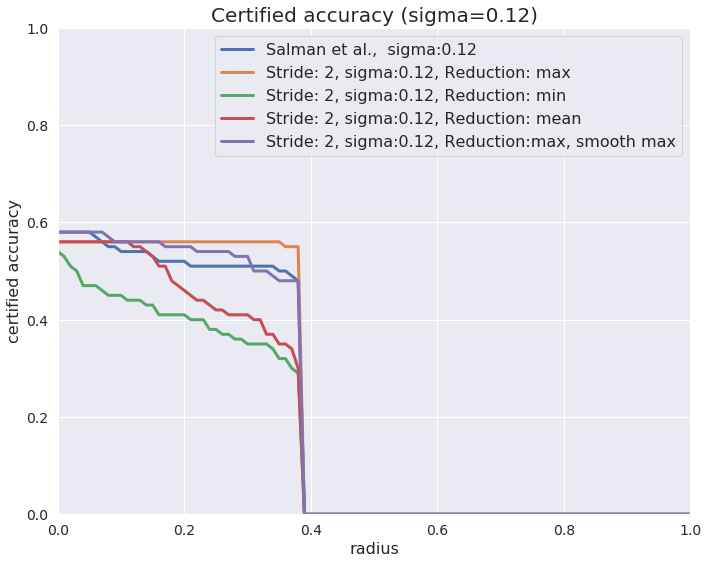

In [5]:
# max_res = get_lines_list('certify_results_salman/', '_2_', '0.12', 'max')
# min_res = get_lines_list('certify_results_salman/', '_2_',  '0.12', 'min')
# mean_res = get_lines_list('certify_results_salman/', '_2_', '0.12', 'mean')
orig = get_lines_list('certify_results_salman_new_nopatch_3232/', '', '0.12', '')
max_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.12', 'max', True)
min_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.12', 'min', True)
mean_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.12', 'mean', True)
max_2 = get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_2_', '0.12', 'max', True, True)
# results_0_12 = max_res
# results_0_12.extend(min_res)
# results_0_12.extend(mean_res)
# results_0_12.extend(orig)
results_0_12 = orig
results_0_12.extend(max_res_patch_smooth)
results_0_12.extend(min_res_patch_smooth)
results_0_12.extend(mean_res_patch_smooth)
results_0_12.extend(max_2)
plot_certified_accuracy('certified acc', 'Certified accuracy (sigma=0.12)', 1.0, results_0_12)

, , 0.25
['certify_results_salman_new_nopatch_3232/output_resnet110_0.25_32_1_mean.csv']
_4_, max, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_4_max.csv']
_4_, min, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_4_min.csv']
_4_, mean, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_4_mean.csv']
_4_, max, 0.25
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.25_32_4_max.csv']


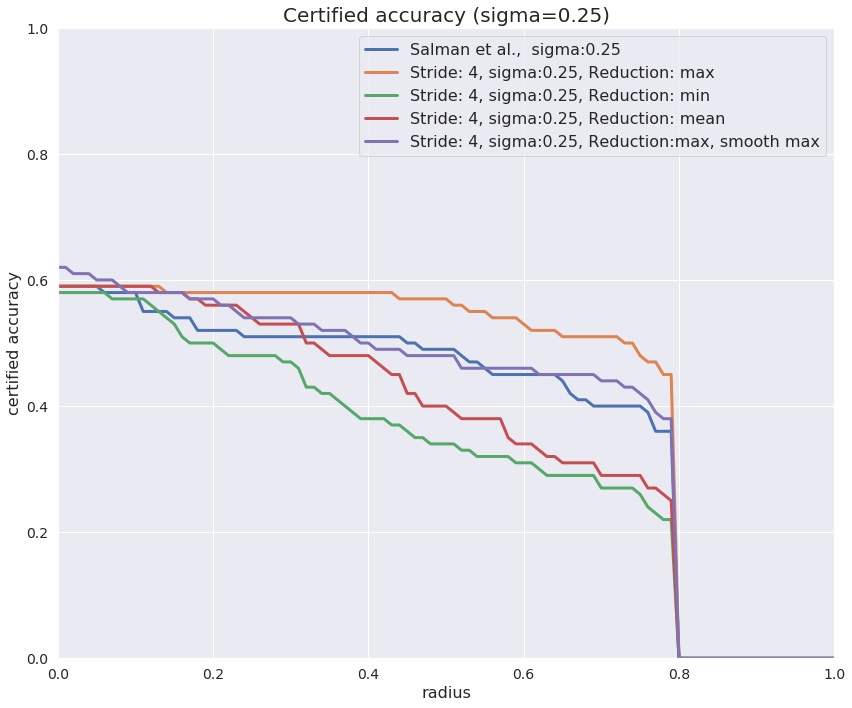

In [20]:
# max_res = get_lines_list('certify_results_salman/', '_4_', '0.25', 'max')
# min_res = get_lines_list('certify_results_salman/', '_4_',  '0.25', 'min')
# mean_res = get_lines_list('certify_results_salman/', '_4_', '0.25', 'mean')
orig = get_lines_list('certify_results_salman_new_nopatch_3232/', '', '0.25', '')
max_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.25', 'max', True)
min_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.25', 'min', True)
mean_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.25', 'mean', True)
max_2 = get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_4_', '0.25', 'max', True, True)
# results_0_25 = max_res
# results_0_25.extend(min_res)
# results_0_25.extend(mean_res)
results_0_25 = orig
#results_0_25.extend(orig)
results_0_25.extend(max_res_patch_smooth)
results_0_25.extend(min_res_patch_smooth)
results_0_25.extend(mean_res_patch_smooth)
results_0_25.extend(max_2)
plot_certified_accuracy('certified acc', 'Certified accuracy (sigma=0.25)', 1.0, results_0_25)

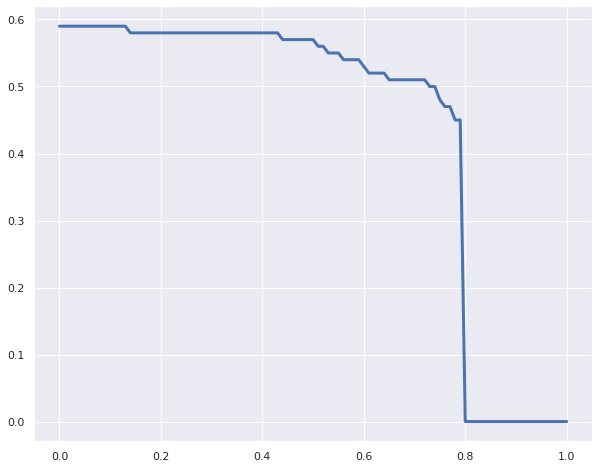

In [ ]:
# max_radius, radius_step = 1.0, 0.01
# radii = np.arange(0, max_radius + radius_step, radius_step)
# radii, max_res_patch_smooth[0].quantity.at_radii(radii)
# plt.plot(radii, max_res_patch_smooth[0].quantity.at_radii(radii))

, , 0.5
['certify_results_salman_new_nopatch/output_resnet110_0.5_32_1_mean.csv']
_2_, max, 0.5
['certify_results_salman_patchsmooth/output_resnet110_0.5_32_2_max.csv']
_2_, min, 0.5
['certify_results_salman_patchsmooth/output_resnet110_0.5_32_2_min.csv']
_2_, mean, 0.5
['certify_results_salman_patchsmooth/output_resnet110_0.5_32_2_mean.csv']
_2_, max, 0.5
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.5_32_2_max.csv']


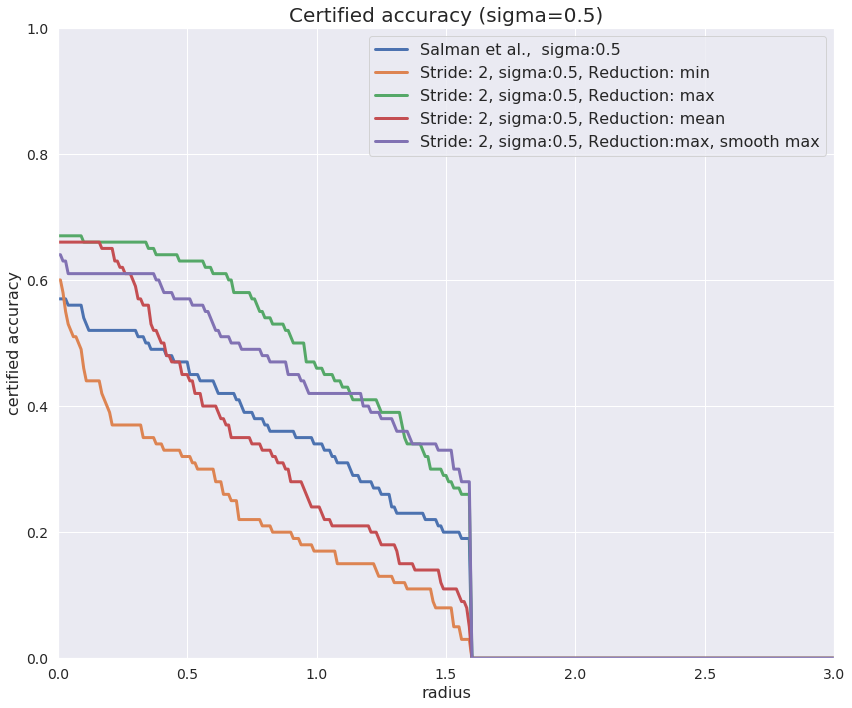

In [21]:
# max_res = get_lines_list('certify_results_salman/', '_4_', '0.5', 'max')
# min_res = get_lines_list('certify_results_salman/', '_4_',  '0.5', 'min')
# mean_res = get_lines_list('certify_results_salman/', '_4_', '0.5', 'mean')
orig = get_lines_list('certify_results_salman_new_nopatch/', '', '0.5', '')
max_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.5', 'max', True)
min_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.5', 'min', True)
mean_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.5', 'mean', True)
max_2 = get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_2_', '0.5', 'max', True, True)
# results_0_5 = max_res
# results_0_5.extend(min_res)
# results_0_5.extend(mean_res)
results_0_5 = orig
results_0_5.extend(min_res_patch_smooth)
results_0_5.extend(max_res_patch_smooth)
results_0_5.extend(mean_res_patch_smooth)
results_0_5.extend(max_2)
plot_certified_accuracy('certified acc', 'Certified accuracy (sigma=0.5)', 3.0, results_0_5)

, , 1.0
['certify_results_salman_new_nopatch_3232/output_resnet110_1.0_32_1_mean.csv']
_4_, max, 1.0
['certify_results_salman_patchsmooth/output_resnet110_1.0_32_4_max.csv']
_4_, min, 1.0
['certify_results_salman_patchsmooth/output_resnet110_1.0_32_4_min.csv']
_4_, mean, 1.0
['certify_results_salman_patchsmooth/output_resnet110_1.0_32_4_mean.csv']
_4_, max, 1.0
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_1.0_32_4_max.csv']


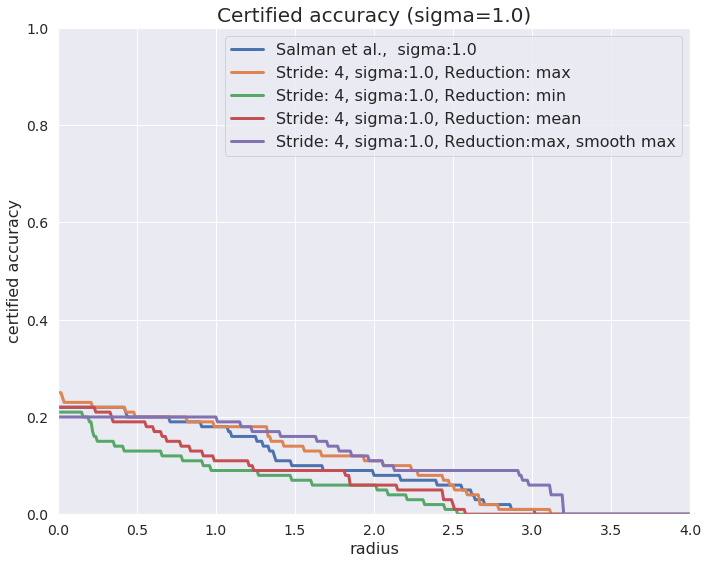

In [13]:
# max_res = get_lines_list('certify_results_salman/', '_4_', '1.0', 'max')
# min_res = get_lines_list('certify_results_salman/', '_4_',  '1.0', 'min')
# mean_res = get_lines_list('certify_results_salman/', '_4_', '1.0', 'mean')
orig = get_lines_list('certify_results_salman_new_nopatch_3232/', '', '1.0', '')
max_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '1.0', 'max', True)
min_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '1.0', 'min', True)
mean_res_patch_smooth = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '1.0', 'mean', True)
max_2 = get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_4_', '1.0', 'max', True, True)
# results_1 = max_res
# results_1.extend(min_res)
# results_1.extend(mean_res)
#results_1.extend(orig)
results_1 = orig
results_1.extend(max_res_patch_smooth)
results_1.extend(min_res_patch_smooth)
results_1.extend(mean_res_patch_smooth)
results_1.extend(max_2)
plot_certified_accuracy('certified acc', 'Certified accuracy (sigma=1.0)', 4.0, results_1)

## Patch size study

, , 0.25
['certify_results_salman_new_nopatch_3232/output_resnet110_0.25_32_1_mean.csv']
_4_, max, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_4_max.csv']
_4_, min, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_4_min.csv']
_4_, mean, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_4_mean.csv']
_2_, max, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_2_max.csv']
_2_, min, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_2_min.csv']
_2_, mean, 0.25
['certify_results_salman_patchsmooth/output_resnet110_0.25_32_2_mean.csv']


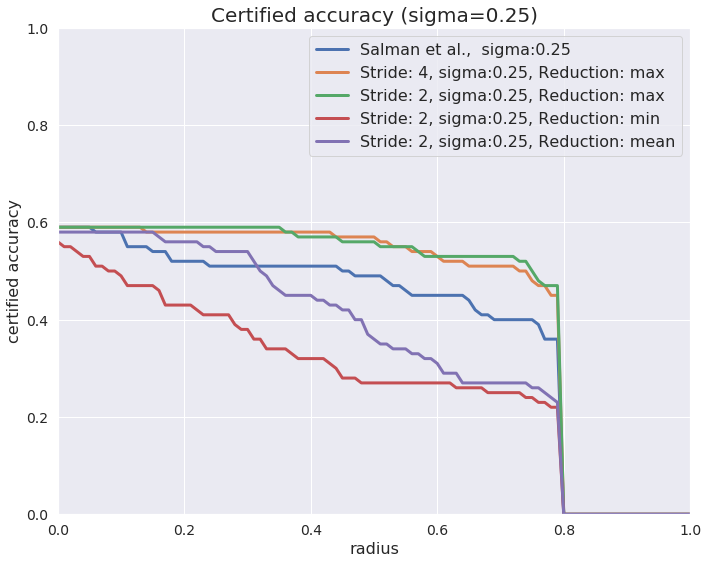

In [7]:
# max_res = get_lines_list('certify_results_salman/', '_2_', '0.25', 'max')
# min_res = get_lines_list('certify_results_salman/', '_2_',  '0.25', 'min')
# mean_res = get_lines_list('certify_results_salman/', '_2_', '0.25', 'mean')
orig = get_lines_list('certify_results_salman_new_nopatch_3232/', '', '0.25', '')
# max_res2= get_lines_list('certify_results_salman/', '_4_', '0.25', 'max')
# min_res2 = get_lines_list('certify_results_salman/', '_4_',  '0.25', 'min')
# mean_res2 = get_lines_list('certify_results_salman/', '_4_', '0.25', 'mean')
#orig = get_lines_list('certify_results_salman_new_nopatch/', '', '0.12', '')
max_res3= get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.25', 'max', True)
min_res3 = get_lines_list('certify_results_salman_patchsmooth/', '_4_',  '0.25', 'min', True)
mean_res3 = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.25', 'mean', True)

max_res4= get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.25', 'max', True)
min_res4 = get_lines_list('certify_results_salman_patchsmooth/', '_2_',  '0.25', 'min', True)
mean_res4 = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.25', 'mean', True)


results_0_12 = orig
results_0_12.extend(max_res3)
#results_0_12.extend(min_res3)
#results_0_12.extend(mean_res3)
results_0_12.extend(max_res4)
results_0_12.extend(min_res4)
results_0_12.extend(mean_res4)


# results_0_12 = max_res
# results_0_12.extend(min_res)
# results_0_12.extend(mean_res)
# results_0_12.extend(orig)
# results_0_12.extend(max_res2)
# results_0_12.extend(min_res2)
# results_0_12.extend(mean_res2)
# results_0_12.extend(max_res3)
# results_0_12.extend(min_res3)
# results_0_12.extend(mean_res3)
# results_0_12.extend(max_res4)
# results_0_12.extend(min_res4)
# results_0_12.extend(mean_res4)
plot_certified_accuracy('certified acc', 'Certified accuracy (sigma=0.25)', 1.0, results_0_12)

, , 0.25
['certify_results_salman_new_nopatch_3232/output_resnet110_0.25_32_1_mean.csv']
_4_, max, 0.25
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.25_32_4_max.csv']
_2_, max, 0.25
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.25_32_2_max.csv']
_1_, max, 0.25
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.25_32_1_max.csv']


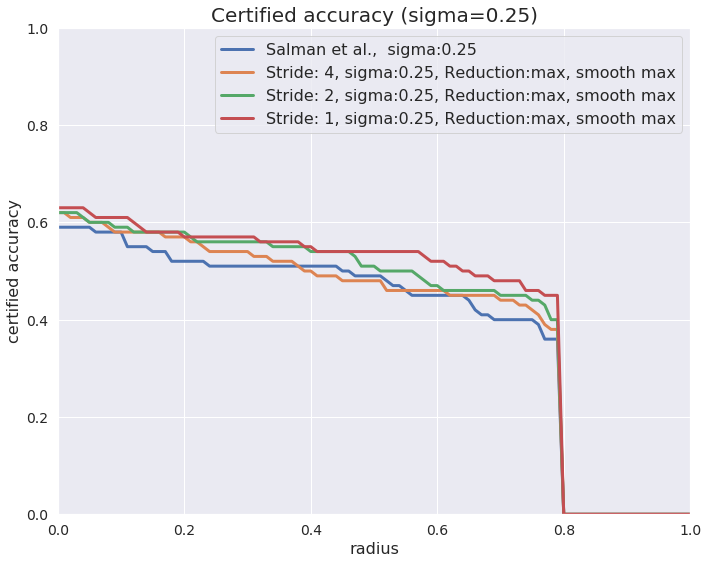

In [4]:
orig = get_lines_list('certify_results_salman_new_nopatch_3232/', '', '0.25', '')
#max_res3= get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.25', 'max', True)
#min_res3 = get_lines_list('certify_results_salman_patchsmooth/', '_4_',  '0.25', 'min', True)
#mean_res3 = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.25', 'mean', True)

# max_res4= get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.25', 'max', True)
# min_res4 = get_lines_list('certify_results_salman_patchsmooth/', '_2_',  '0.25', 'min', True)
# mean_res4 = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.25', 'mean', True)

max_res5= get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_4_', '0.25', 'max', True, True)


max_res6= get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_2_', '0.25', 'max', True, True)

max_res7 = get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_1_','0.25', 'max', True, True)



results_0_12 = orig
#results_0_12.extend(max_res3)
#results_0_12.extend(min_res3)
#results_0_12.extend(mean_res3)
#results_0_12.extend(max_res4)
#results_0_12.extend(min_res4)
#results_0_12.extend(mean_res4)
results_0_12.extend(max_res5)
results_0_12.extend(max_res6)
results_0_12.extend(max_res7)

plot_certified_accuracy('certified acc', 'Certified accuracy (sigma=0.25)', 1.0, results_0_12)

, , 0.5
['certify_results_salman_new_nopatch_3232/output_resnet110_0.5_32_1_mean.csv']
_4_, max, 0.5
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.5_32_4_max.csv']
_2_, max, 0.5
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.5_32_2_max.csv']
_1_, max, 0.5
['certify_results_salman_patchsmooth_smoothmax/output_resnet110_0.5_32_1_max.csv']
_1_, max, 0.5
['certify_results_salman_patchsmooth_smoothmax_randompatches_25/output_resnet110_0.5_32_1_max.csv']
_1_, max, 0.5
['certify_results_salman_patchsmooth_smoothmax_randompatches_50/output_resnet110_0.5_32_1_max.csv']
_1_, max, 0.5
['certify_results_salman_patchsmooth_smoothmax_randompatches_100/output_resnet110_0.5_32_1_max.csv']


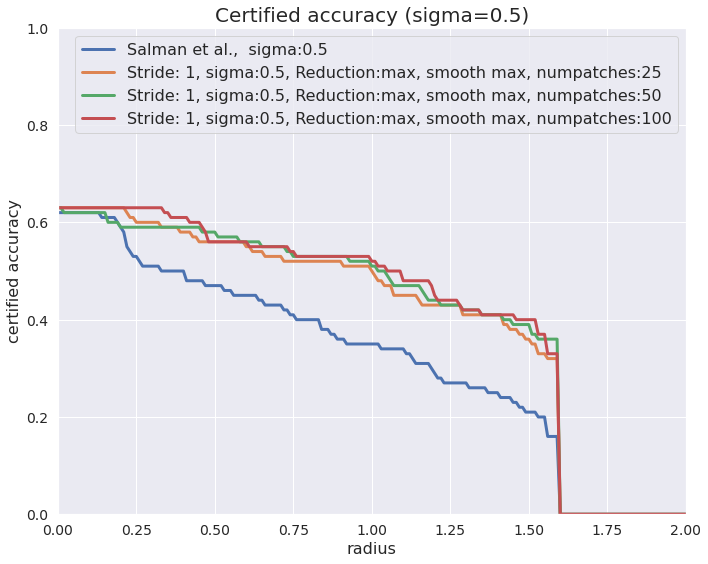

In [12]:
orig = get_lines_list('certify_results_salman_new_nopatch_3232/', '', '0.5', '')
# max_res3= get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.5', 'max', True)
# #min_res3 = get_lines_list('certify_results_salman_patchsmooth/', '_4_',  '0.25', 'min', True)
# #mean_res3 = get_lines_list('certify_results_salman_patchsmooth/', '_4_', '0.25', 'mean', True)

# max_res4= get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.5', 'max', True)
#min_res4 = get_lines_list('certify_results_salman_patchsmooth/', '_2_',  '0.25', 'min', True)
#mean_res4 = get_lines_list('certify_results_salman_patchsmooth/', '_2_', '0.25', 'mean', True)

max_res5= get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_4_', '0.5', 'max', True, True)


max_res6= get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_2_', '0.5', 'max', True, True)

max_res7 = get_lines_list('certify_results_salman_patchsmooth_smoothmax/', '_1_','0.5', 'max', True, True)

max_res8 = get_lines_list('certify_results_salman_patchsmooth_smoothmax_randompatches_25/', '_1_', '0.5', 'max', True, True, 25)
max_res9 = get_lines_list('certify_results_salman_patchsmooth_smoothmax_randompatches_50/', '_1_', '0.5', 'max', True, True, 50)
max_res10 = get_lines_list('certify_results_salman_patchsmooth_smoothmax_randompatches_100/', '_1_', '0.5', 'max', True, True, 100)




results_0_12 = orig
#results_0_12.extend(max_res3)
#results_0_12.extend(min_res3)
#results_0_12.extend(mean_res3)
#results_0_12.extend(max_res4)
#results_0_12.extend(min_res4)
#results_0_12.extend(mean_res4)
#results_0_12.extend(max_res5)
#results_0_12.extend(max_res6)
#results_0_12.extend(max_res7)
results_0_12.extend(max_res8)
results_0_12.extend(max_res9)
results_0_12.extend(max_res10)

plot_certified_accuracy('certified acc', 'Certified accuracy (sigma=0.5)', 2.0, results_0_12)

In [39]:
def get_accuracy_plots(inpath, legend, outpath, max_radius, radius_step=0.01):
    radius_start=0.0
    appx_acc = ApproximateAccuracy(inpath)
    radii = np.arange(radius_start, max_radius + radius_step, radius_step)
    method = Line(appx_acc)
    accuracies = method.quantity.at_radii(radii)
    print(outpath)
    with open(outpath, 'w') as f:
        f.write('radius,accuracy\n')
        for rad, acc in zip(radii, accuracies):
            f.write(f'{rad:.03f},{acc}\n')    
    return accuracies, radii

In [40]:
get_accuracy_plots('certify_results_salman_new_nopatch_3232/output_resnet110_0.12_32_1_mean.csv', 'tst_csv.csv', './test_csv.csv', 1.0)

./test_csv.csv


(array([0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.57, 0.56, 0.55, 0.55, 0.54,
        0.54, 0.54, 0.54, 0.54, 0.53, 0.52, 0.52, 0.52, 0.52, 0.52, 0.51,
        0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51,
        0.51, 0.51, 0.5 , 0.5 , 0.49, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.